In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
recipes_df = pd.read_csv('recipes.csv')
recipes_df.head()

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.81,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,2.63,13.13,0.32,21.09,100.80,10.08,0.28,1.53,9.89,3.3
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,0.65,3.26,0.10,6.47,26.79,2.68,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,0.66,3.29,0.07,4.64,162.84,16.28,NaN,NaN,NaN,NaN


#### 1. Print the names of Columns that have null values

In [4]:
recipes_df.columns[recipes_df.isna().any()].tolist()

['FiberAmount',
 'FiberpercentOfDailyNeed',
 'VitaminB6Amount',
 'VitaminB6percentOfDailyNeed',
 'ManganeseAmount',
 'ManganesepercentOfDailyNeed',
 'SeleniumAmount',
 'SeleniumpercentOfDailyNeed',
 'PotassiumAmount',
 'PotassiumpercentOfDailyNeed',
 'VitaminB2Amount',
 'VitaminB2percentOfDailyNeed',
 'VitaminCAmount',
 'VitaminCpercentOfDailyNeed',
 'PhosphorusAmount',
 'PhosphoruspercentOfDailyNeed',
 'FolateAmount',
 'FolatepercentOfDailyNeed',
 'VitaminB5Amount',
 'VitaminB5percentOfDailyNeed',
 'MagnesiumAmount',
 'MagnesiumpercentOfDailyNeed',
 'IronAmount',
 'IronpercentOfDailyNeed',
 'VitaminKAmount',
 'VitaminKpercentOfDailyNeed',
 'CopperAmount',
 'CopperpercentOfDailyNeed',
 'VitaminAAmount',
 'VitaminApercentOfDailyNeed',
 'VitaminB12Amount',
 'VitaminB12percentOfDailyNeed',
 'VitaminDAmount',
 'VitaminDpercentOfDailyNeed',
 'ZincAmount',
 'ZincpercentOfDailyNeed',
 'VitaminEAmount',
 'VitaminEpercentOfDailyNeed',
 'VitaminB3Amount',
 'VitaminB3percentOfDailyNeed',
 'Vitami

#### 2. Print the recipes with the highest number of aggregateLikes

In [5]:
recipes_df[recipes_df['aggregateLikes'] == recipes_df['aggregateLikes'].max()]

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
50,50,False,True,True,False,4.0,16911,715419,Slow Cooker Spicy Hot Wings,101.43,...,7.42,37.09,0.08,5.0,44.21,4.42,NaN,NaN,NaN,NaN


#### 3. Handle the missing values of “calcium percent of Daily need”. Sort the resulting DataFrame by id column.

In [6]:
recipes_df['CalciumpercentOfDailyNeed'].isna().sum()

8

In [7]:
meanCaPerDailyNeed = recipes_df['CalciumpercentOfDailyNeed'].mean()
meanCaPerDailyNeed

12.25669014084507

In [9]:
recipes_df['CalciumpercentOfDailyNeed'].replace(np.NaN, meanCaPerDailyNeed, inplace=True)
# recipes_df['CalciumpercentOfDailyNeed'].fillna(meanCaperDailyNeed, inplace=True)
recipes_df

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.81000,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,12.25669,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,2.63,13.13,0.32,21.09,100.80,10.08000,0.28,1.53,9.89,3.30
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,0.65,3.26,0.10,6.47,26.79,2.68000,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,0.66,3.29,0.07,4.64,162.84,16.28000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,False,True,True,False,18.0,13,638315,"Chicken Sausage, White Bean and Cabbage Soup",196.23,...,0.53,2.67,0.15,10.23,102.67,10.27000,NaN,NaN,NaN,NaN
146,146,True,False,False,False,1.0,2,656248,Pinot Noir Brownies,65.76,...,0.21,1.07,0.03,1.68,19.82,1.98000,2.48,13.76,10.69,3.56
147,147,True,True,True,True,93.0,2,637297,Cauliflower Chickpea Stew,139.28,...,4.77,23.83,0.45,29.70,141.16,14.12000,NaN,NaN,NaN,NaN
148,148,True,True,False,False,5.0,1,659412,Sautéed Balsamic Green Beans With Cherry Tomatoes,101.81,...,1.15,5.73,0.12,7.85,55.64,5.56000,NaN,NaN,NaN,NaN


In [10]:
recipes_df['CalciumpercentOfDailyNeed'].isna().sum()

0

In [11]:
df1 = recipes_df.sort_values(by=['id'])
df1

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN,34.04,11.35
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,...,1.23,6.13,0.23,15.57,83.41,8.34,NaN,NaN,NaN,NaN
30,30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,...,2.14,10.71,0.20,13.09,154.27,15.43,NaN,NaN,NaN,NaN
118,118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,...,2.43,12.15,0.10,6.47,101.41,10.14,NaN,NaN,NaN,NaN
39,39,True,True,True,False,7.0,6,1098357,Three Ingredient Frozen Pina Colada,214.60,...,1.05,5.25,0.19,12.66,52.87,5.29,13.36,74.22,NaN,NaN


#### 4. Delete the columns that have count of null values == 141

In [12]:
df1.isnull().sum() #count null values in each column

Unnamed: 0                      0
vegetarian                      0
glutenFree                      0
dairyFree                       0
veryHealthy                     0
                             ... 
CalciumpercentOfDailyNeed       0
AlcoholAmount                 129
AlcoholpercentOfDailyNeed     129
CaffeineAmount                141
CaffeinepercentOfDailyNeed    141
Length: 79, dtype: int64

In [13]:
df1.shape

(150, 79)

In [14]:
columnsToDrop = df1.columns[df1.isnull().sum() == 141]
columnsToDrop

Index(['CaffeineAmount', 'CaffeinepercentOfDailyNeed'], dtype='object')

In [15]:
#drop columns with null values count== 141
df1.drop(columns=columnsToDrop, inplace=True) 
df1.head()

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminEAmount,VitaminEpercentOfDailyNeed,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,0.84,5.61,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,4.61,30.71,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,0.53,3.52,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,1.08,7.19,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,3.98,26.52,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN


In [16]:
df1.shape

(150, 77)

#### 5. Print the title of the recipes that are vegetarian == TRUE and glutenFree == True

In [17]:
df1[(df1['vegetarian'] == True ) & (df1['glutenFree'] == True)].title.tolist()

['Banana Blueberry Pancakes',
 'Basil and Orange Confit Compound Butter',
 'Beet Slaw',
 'Blender Carrot Soup',
 'Blueberry Mojito Popsicles',
 'Breakfast Porridge',
 'Butternut Squash Soup',
 'Cauliflower Chickpea Stew',
 'Cherries and Yogurt Parfait',
 'Dandelion pesto',
 'Detox Orange Carrot Juice',
 'Easy Eggplant Parmesan',
 'EASY, CUMIN-LENTIL SPREAD',
 'Fire Roasted Tomato Chutney',
 'Fried Brown Rice',
 'Green Beans with Garlic Chips',
 'Indian-Style Dill and Turmeric Potato Salad',
 'Japanese Cucumber Salad',
 'Kappa Maki',
 'Layered Greek Salad',
 'Luscious Palak Paneer',
 'Mango Cranberry Sherbet',
 'Nutty Rice',
 'Peach Coconut Ice Cream',
 'Peanut Butter Cookies with Flax Seeds and Chocolate',
 'Roasted Asparagus with Egg Salad',
 'Roasted Strawberry Coconut Milk Ice Cream',
 'Sautéed Balsamic Green Beans With Cherry Tomatoes',
 'Sautéed Balsamic Green Beans With Cherry Tomatoes',
 'Seasonal Autumn Stew',
 'Spicy Carrot Amaranth Soup',
 'Stir Fried Cabbage and Tomatoes',
 

#### 6. How many vegan recipes are there (Vegan = Vegetarian and dairy free)?

In [18]:
veganRecipes = df1[(df1['vegetarian'] == True ) & (df1['dairyFree'] == True)]
len(veganRecipes)

29

#### 7. Compare the average amount of Vitamin B12 for the vegan and non-vegan recipes. How reliable are the results?

In [19]:
veganRecipes.shape

(29, 77)

In [20]:
# Average of B12 for vagan
veganRecipes['VitaminB12Amount'].mean()

0.24333333333333332

In [21]:
nonVeganRecipes = df1[(df1['vegetarian'] == False ) & (df1['dairyFree'] == False)]
nonVeganRecipes.shape

(55, 77)

In [22]:
# Average of B12 for non-vagan
nonVeganRecipes['VitaminB12Amount'].mean()

1.3282978723404253

Vegan has less Vitamin B12 than non-vegan

#### 8. Compare the average health Score for both types of recipes (vegan vs non-vegan).

In [23]:
# Average of healthScore for vagan
veganRecipes['healthScore'].mean()

27.724137931034484

In [24]:
# Average of healthScore for non-vagan
nonVeganRecipes['healthScore'].mean()

19.945454545454545

Vegan recipies are more healthier than non-vegan recipes

#### 9. Create a new column: "VeganWeek" where you decrease the price of vegan products by 10%, but only if they already cost more than 100.

In [25]:
df1['VeganWeek']= veganRecipes[veganRecipes['pricePerServing']>100]['pricePerServing']*0.9

In [26]:
df1[['title','pricePerServing','VeganWeek','vegetarian']]

,title,pricePerServing,VeganWeek,vegetarian
83,Oeufs En Meurette,209.85,NaN,False
43,Tortilla Burger Loco Vaca,407.86,NaN,False
104,"Bad Boy"" Giant Double Chocolate Cookies",44.08,NaN,False
95,Allergy-Free Stuffed Portobello Mushrooms,138.47,NaN,False
52,Almond Butter and Chocolate Squares,92.26,NaN,False
...,...,...,...,...
134,Garlic-Roasted Brussels Sprouts Side Dish,170.34,153.306,True
30,Vegan Chana Masala Curry,165.89,149.301,True
118,Potato & Leek Soup with Roasted Beets,244.08,NaN,False
39,Three Ingredient Frozen Pina Colada,214.60,193.140,True


#### 10. Among the non-vegan recipes, find the one requiring most time to prepare. what is it called?

In [27]:
nonVeganRecipes[nonVeganRecipes['readyInMinutes'] == nonVeganRecipes['readyInMinutes'].max()]['title']

83    Oeufs En Meurette
Name: title, dtype: object

Oeufs En Meurette is the non-vegan recipes which requires most time to prepare

#### 11. Build a model using linear regression on this dataset

In [28]:
data = df1[['pricePerServing','healthScore']]
data

,pricePerServing,healthScore
83,209.85,5.0
43,407.86,44.0
104,44.08,4.0
95,138.47,9.0
52,92.26,2.0
...,...,...
134,170.34,77.0
30,165.89,17.0
118,244.08,38.0
39,214.60,7.0


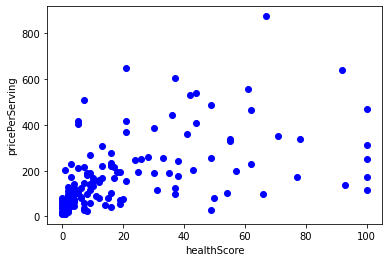

In [29]:
plt.scatter(data['healthScore'] , data['pricePerServing'] , color='blue')
plt.xlabel('healthScore')
plt.ylabel('pricePerServing')
plt.show()

In [30]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [31]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[['healthScore']])
train_y = np.array(train[['pricePerServing']])
regr.fit(train_x,train_y)

LinearRegression()

In [32]:
# The coefficients:
print ('coefficients :' ,regr.coef_) #Slope
print ('Intercept : ',regr.intercept_) #Intercept

coefficients : [[3.15368235]]
Intercept :  [108.62928473]


Text(0, 0.5, 'Price')

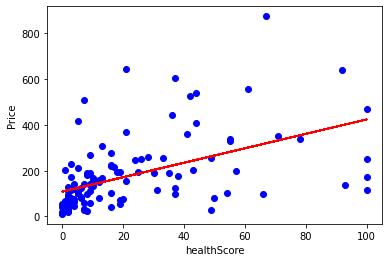

In [33]:
# Plotting the regression line:
plt.scatter(train['healthScore'],train['pricePerServing'], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('healthScore')
plt.ylabel('Price')


In [34]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['healthScore']])
test_y = np.array(test[['pricePerServing']])
test_y_ = regr.predict(test_x)
test_y_

array([[423.99751946],
       [111.78296707],
       [114.93664942],
       [121.24401411],
       [108.62928473],
       [111.78296707],
       [143.31979055],
       [118.09033177],
       [121.24401411],
       [114.93664942],
       [124.39769646],
       [108.62928473],
       [159.08820228],
       [108.62928473],
       [111.78296707],
       [149.62715524],
       [111.78296707],
       [304.15759026],
       [108.62928473],
       [114.93664942],
       [304.15759026],
       [152.78083759],
       [174.85661402],
       [263.15971975],
       [203.23975515],
       [351.46282547],
       [162.24188463],
       [228.46921392],
       [130.70506116],
       [155.93451994]])

In [35]:
print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Mean sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_ , test_y) )

Mean absolute error: 93.71
Mean sum of squares (MSE): 13342.42
R2-score: -1.03
